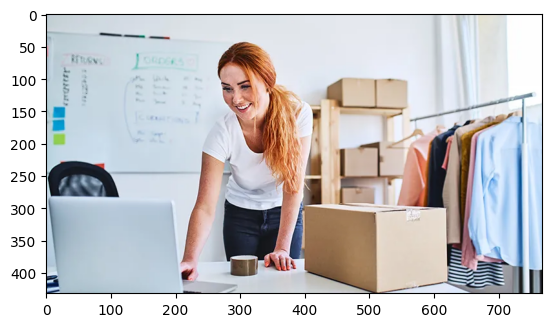

In [455]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('vendas.jpg'))

## Define a Forma de Pagamento Que Cada Cliente Vai Adotar na Sua Compra
- O conjunto de dados contém informações de 100 mil pedidos de 2016 a 2018 feitos em vários marketplaces no Brasil. Seus recursos permitem visualizar um pedido em múltiplas dimensões: desde status do pedido, preço, desempenho de pagamento e frete até localização do cliente, atributos do produto e finalmente avaliações escritas pelos clientes.
https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

- Este projeto prevê as prováveis formas de pagamento que cada cliente vai adotar em uma compra, mostrando o percentual de probabilidade de cada uma, podendo, o vendedor/sistema, se antecipar no convencimento da venda para seu cliente.

## Junta tabelas, faz a limpeza dos dados e os devidos tratamentos deixando-os prontos para análise

In [456]:
# importa as bibliotecas
import pandas as pd
from pandasql import sqldf
from sklearn.preprocessing import OneHotEncoder

In [457]:
# faz a leitura dos arquivos
oPayments = pd.read_csv('arquivos/olist_order_payments_dataset.csv')
orders = pd.read_csv('arquivos/olist_orders_dataset.csv')
oItems = pd.read_csv('arquivos/olist_order_items_dataset.csv')

'''
oReviews = pd.read_csv('arquivos/olist_order_reviews_dataset.csv')
customers = pd.read_csv('arquivos/olist_customers_dataset.csv')
geo = pd.read_csv('arquivos/olist_geolocation_dataset.csv')
products = pd.read_csv('arquivos/olist_products_dataset.csv')
sellers = pd.read_csv('arquivos/olist_sellers_dataset.csv')
category = pd.read_csv('arquivos/product_category_name_translation.csv')
'''

"\noReviews = pd.read_csv('arquivos/olist_order_reviews_dataset.csv')\ncustomers = pd.read_csv('arquivos/olist_customers_dataset.csv')\ngeo = pd.read_csv('arquivos/olist_geolocation_dataset.csv')\nproducts = pd.read_csv('arquivos/olist_products_dataset.csv')\nsellers = pd.read_csv('arquivos/olist_sellers_dataset.csv')\ncategory = pd.read_csv('arquivos/product_category_name_translation.csv')\n"

In [458]:
# verifica o conteudo de cada arquivo carregado
print('oPayments')
print(oPayments.head(3))

print(' ')
print('orders')
print(orders.head(3))

print(' ')
print('oItems')
print(oItems.head(3))

oPayments
                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
 
orders
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  20

In [459]:
# junta os dados de interesse no mesmo data frame
dfvendas = sqldf(
             " select o.order_id, o.customer_id, p.payment_type, p.payment_installments, " \
             " p.payment_value, i.price as price_item " \
             " from orders o " \
             " inner join oPayments p on (o.order_id = p.order_id) " \
             " inner join oItems i on (o.order_id = i.order_id) " \
             " order by o.order_id "
             )

In [460]:
# verifica a quantidade de linhas e colunas do dataframe
dfvendas.shape

(117601, 6)

In [461]:
dfvendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              117601 non-null  object 
 1   customer_id           117601 non-null  object 
 2   payment_type          117601 non-null  object 
 3   payment_installments  117601 non-null  int64  
 4   payment_value         117601 non-null  float64
 5   price_item            117601 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.4+ MB


In [462]:
# verifica o novo dataframe com as colunas de interesse
dfvendas.head()

,order_id,customer_id,payment_type,payment_installments,payment_value,price_item
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,credit_card,2,72.19,58.90
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,credit_card,3,259.83,239.90
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,credit_card,5,216.87,199.00
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,credit_card,2,25.78,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,credit_card,3,218.04,199.90


In [463]:
# verifica se existe linhas duplicadas
dfvendas.duplicated().sum()

12401

In [464]:
# elimina linhas duplicadas
dfvendas = dfvendas.drop_duplicates(keep='last')

In [465]:
dfvendas.reset_index(drop=True, inplace=True)

In [466]:
# verifica se tem algum valor nulo
dfvendas.isnull().value_counts()

order_id  customer_id  payment_type  payment_installments  payment_value  price_item
False     False        False         False                 False          False         105200
Name: count, dtype: int64

In [467]:
# verifica se o tipo das variáveis está compatível com os dados de cada coluna
dfvendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105200 entries, 0 to 105199
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              105200 non-null  object 
 1   customer_id           105200 non-null  object 
 2   payment_type          105200 non-null  object 
 3   payment_installments  105200 non-null  int64  
 4   payment_value         105200 non-null  float64
 5   price_item            105200 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ MB


In [468]:
# verifica os tipos de pagamentos praticados pelos clientes
dfvendas['payment_type'].value_counts()

payment_type
credit_card    78334
boleto         20086
voucher         5217
debit_card      1563
Name: count, dtype: int64

In [469]:
def converte_tipo_nro(tipo):
    if tipo=='credit_card':
        return 0
    elif tipo=='boleto':
        return 1
    elif tipo=='voucher':
        return 2
    else:
        return 3

In [470]:
# transforma a coluna payment_type em tipo numerico de classe
dfvendas['tipo_pagto_nro'] = dfvendas['payment_type'].apply(converte_tipo_nro) 

In [471]:
# converte payment_type em colunas de tipos de pagamento com valores 0 e 1
ohe = OneHotEncoder()
ohe = ohe.fit(dfvendas[['payment_type']])
ohe_df = pd.DataFrame(ohe.transform(dfvendas[['payment_type']]).toarray())

In [472]:
# coloca o cabeçalho original no dataframe
ohe_df.columns = ohe.get_feature_names_out()

In [473]:
# visualiza cabeçalho e primeiras linhas
ohe_df.head(3)

,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0


In [474]:
# verifica se a quantidade de linhas é a mesma do dataframe de origem
ohe_df.shape

(105200, 4)

In [475]:
# junta dataframe categorias com o dataframe original
#dfvendas = pd.concat([dfvendas, ohe_df], axis=1)

In [476]:
# verifica se tem algum nulo no novo dataframe concatenado
dfvendas.isnull().value_counts()

order_id  customer_id  payment_type  payment_installments  payment_value  price_item  tipo_pagto_nro
False     False        False         False                 False          False       False             105200
Name: count, dtype: int64

In [477]:
# verifica as primeiras linhas do dataframe concatenado
dfvendas.head(3)

,order_id,customer_id,payment_type,payment_installments,payment_value,price_item,tipo_pagto_nro
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,credit_card,2,72.19,58.9,0
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,credit_card,3,259.83,239.9,0
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,credit_card,5,216.87,199.0,0


In [478]:
# análise dos dados por tipo de pagamento
#sb.pairplot(data=dfvendas[['payment_type', 'payment_installments', 'payment_value', 'price_item']], 
#            hue='payment_type', palette='rainbow')

In [479]:
# apaga a coluna payment_type que deu origem às colunas de categorias
dfvendas = dfvendas.drop('payment_type', axis=1)

In [480]:
# verifica a frequência dos valores 0 e 1 em cada categoria
'''
print(dfvendas.groupby('payment_type_boleto').size()); print(' ')
print(dfvendas.groupby('payment_type_credit_card').size()); print(' ')
print(dfvendas.groupby('payment_type_debit_card').size()); print(' ')
print(dfvendas.groupby('payment_type_voucher').size()); print(' ')
'''

"\nprint(dfvendas.groupby('payment_type_boleto').size()); print(' ')\nprint(dfvendas.groupby('payment_type_credit_card').size()); print(' ')\nprint(dfvendas.groupby('payment_type_debit_card').size()); print(' ')\nprint(dfvendas.groupby('payment_type_voucher').size()); print(' ')\n"

In [481]:
# verifica algumas estatísticas iniciais
dfvendas.describe()

,payment_installments,payment_value,price_item,tipo_pagto_nro
count,105200.000000,105200.000000,105200.000000,105200.000000
mean,2.897234,157.240578,125.178131,0.334686
std,2.720013,218.189183,190.579012,0.641095
min,0.000000,0.000000,0.850000,0.000000
25%,1.000000,58.000000,40.900000,0.000000
50%,2.000000,102.260000,79.000000,0.000000
75%,4.000000,175.770000,139.122500,1.000000
max,24.000000,13664.080000,6735.000000,3.000000


In [482]:
# salva os dados tratados
dfvendas.to_csv('arquivos_tratados/dfvendas.csv', index=False)